In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#parametrizer for the angle sweeping from pi to 0. It uses the Fermi-Dirac distribution, the smoothness of which dictates how long the simulation will
#spend around maximal neutron number density
def h(w,t,t_mid):
    delta_t = t - t_mid
    return np.pi/(1.0 + np.exp(delta_t/w))

def var_calc(x_1,x_2,x_3,y_1,y_2,y_3):
    A= np.array([[-1,0,1],[1,0,1],[0,-1,1]])
    b = np.array([x_1,
                x_2,
                x_3])
    x = np.linalg.solve(A,b)
    rx_cos = x[0]
    ry_sin = x[1]
    x_0 = x[2]

    b = np.array([y_1,
                y_2,
                y_3])
    x = np.linalg.solve(A,b)
    rx_sin = x[0]
    ry_cos = x[1]
    y_0 = x[2]

    return x_0,y_0,rx_cos,ry_sin,rx_sin,ry_cos

In [21]:
#define 3 points you wish the ellipse to pass through. _1 and _2 represent start and finish while _3 represents intermediate points
#Would also need to to define a density, could be profile (to be added later) or a constant
rho_0 = 1e+3 #g/cc
#T_9 scale
t9_1 = 0.125
t9_2 = 0.25
t9_3 = 0.3

#Exponent of the power of 10
nn_1_log = 1
nn_2_log = 2
nn_3_log = 9 

w = 1e+11 #smoothening factor
time = np.linspace(0,3.1536e+12,820)
t_mid = (3.1536e+12)/2.0

In [22]:
[x_0,y_0,rx_cos,ry_sin,rx_sin,ry_cos] = var_calc(t9_1,t9_2,t9_3,nn_1_log,nn_2_log,nn_3_log)
x_t = rx_cos*np.cos(h(w,time,t_mid)) - ry_sin*np.sin(h(w,time,t_mid)) + x_0
y_t = rx_sin*np.cos(h(w,time,t_mid)) - ry_cos*np.sin(h(w,time,t_mid)) + y_0 

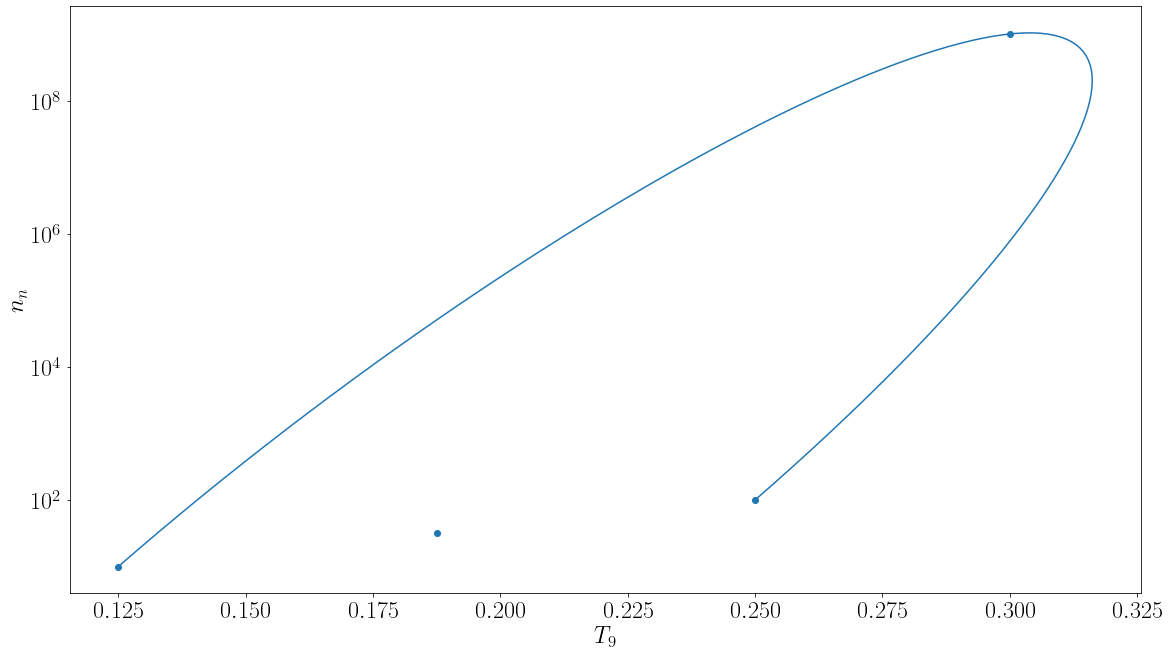

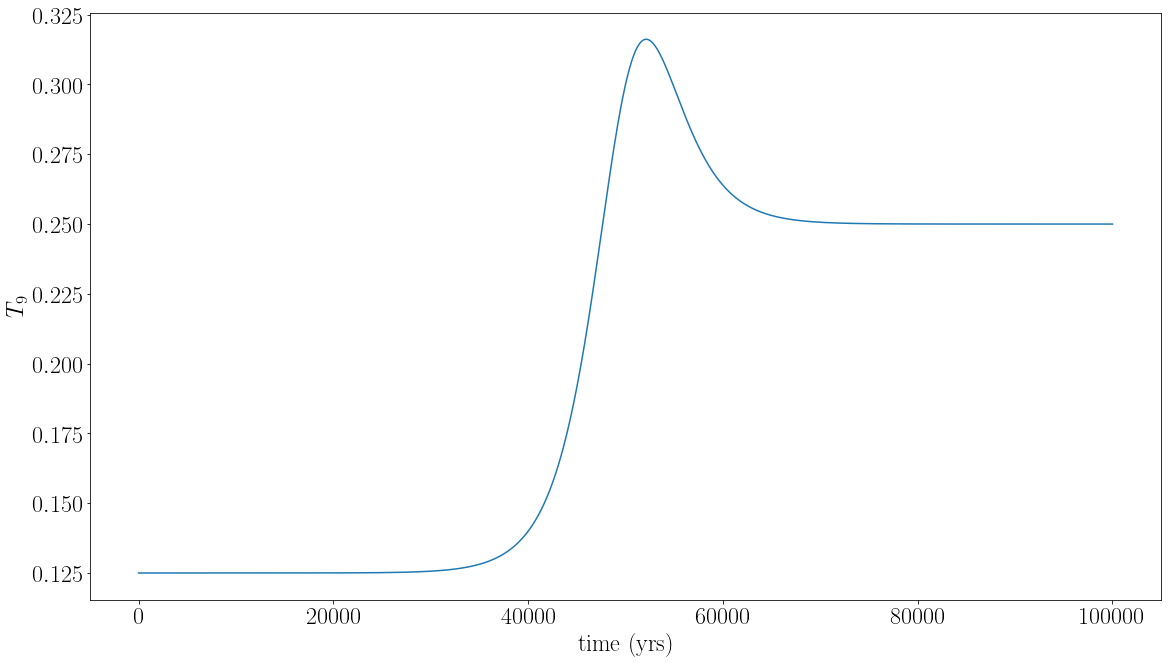

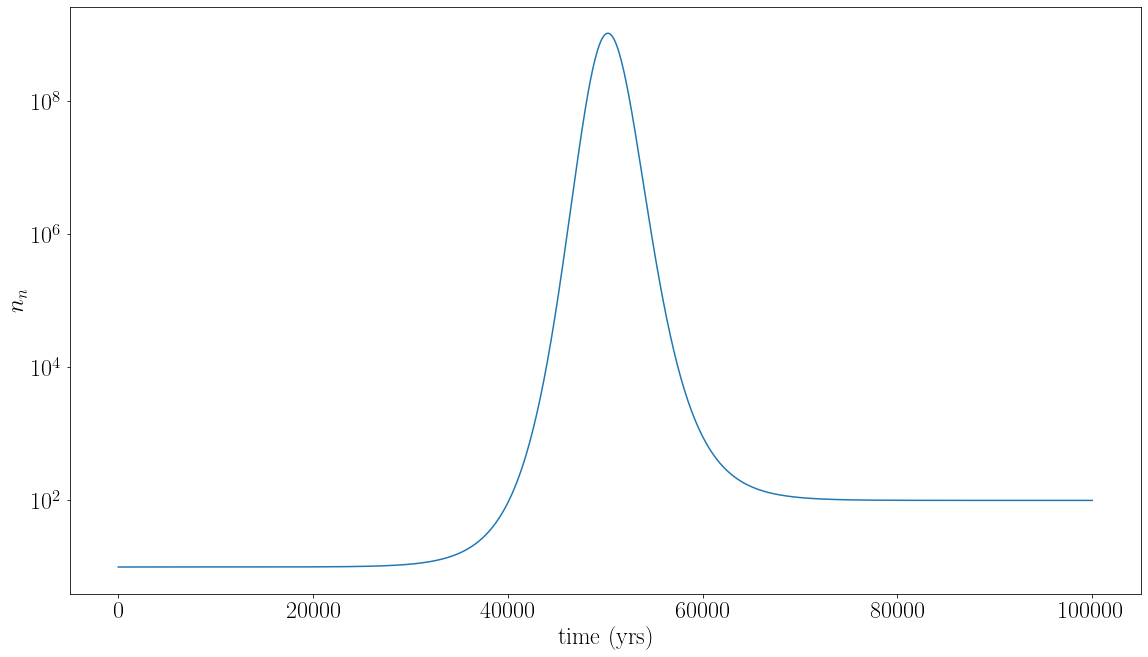

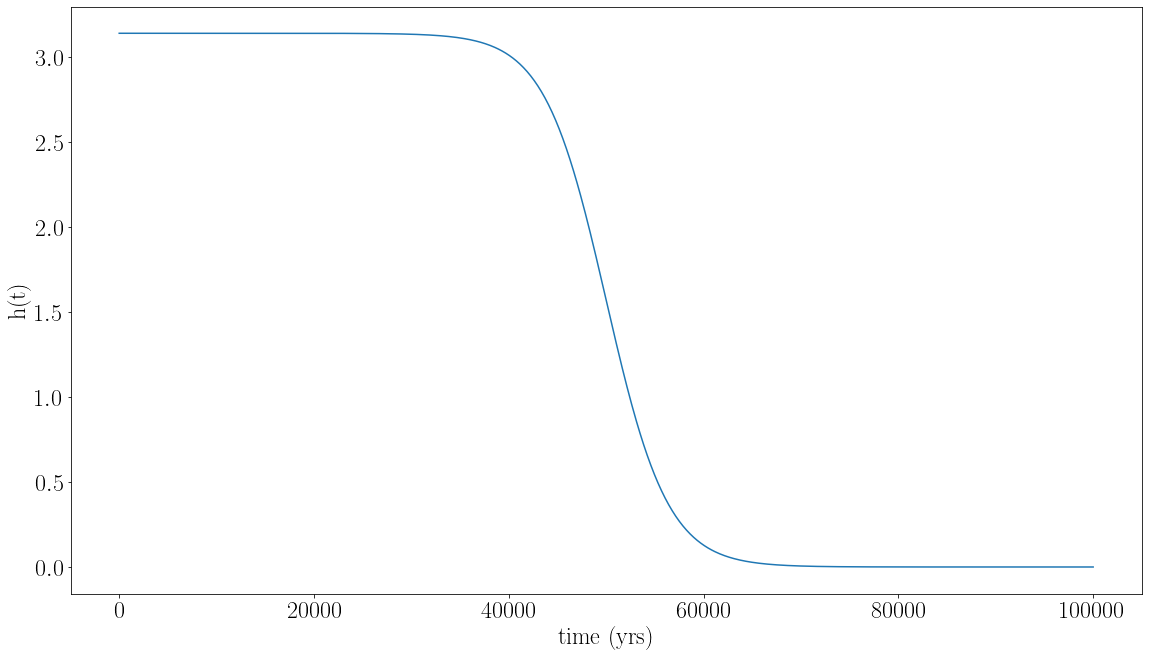

In [23]:
plt.figure(figsize =[19.20,10.80])
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.rcParams['font.size']=24

plt.plot(x_t,10**y_t)
t9 = np.array([x_0,t9_1,t9_2,t9_3])
n = np.array([y_0,nn_1_log,nn_2_log,nn_3_log])
plt.scatter(t9,10**n)
plt.yscale('log')
plt.ylabel(r'$n_{n}$')
plt.xlabel(r'$T_{9}$')

plt.figure(figsize=[19.20,10.80])
plt.plot(time/3.1536e+7,x_t)
plt.ylabel(r'$T_{9}$')
plt.xlabel('time (yrs)')

plt.figure(figsize=[19.20,10.80])
plt.plot(time/3.1536e+7,10**y_t)
plt.ylabel(r'$n_{n}$')
plt.xlabel('time (yrs)')
plt.yscale('log')

plt.figure(figsize=[19.20,10.80])
plt.plot(time/3.1536e+7,h(w,time,t_mid))
plt.ylabel('h(t)')
plt.xlabel('time (yrs)')
plt.show()

In [24]:
rho_0 = rho_0*np.ones(len(time))
traj_data = np.column_stack((time,x_t,rho_0))
np.savetxt('traj.txt',traj_data)

x_n = (10.0**y_t)/(rho_0*6.0221409e+23)
frac_data = np.column_stack((time,x_n))
np.savetxt('t_xn.txt',frac_data)

data = np.column_stack((time,x_t,10**y_t))
np.savetxt('data_1.txt',data)